In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
data_2d = pd.read_csv('/content/drive/MyDrive/HW9_data/data_2d.csv')
mnist_data = pd.read_csv('/content/drive/MyDrive/HW9_data/mnist.csv')

data_2d.head()

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482


In [27]:
data_2d.drop('0.000000000000000000e+00', axis = 1)

,-7.687164597386728637e-01,4.608603078297135447e-01,cluster
0,2.687848,2.366961,0
1,-0.201379,0.470430,1
2,0.608496,1.225400,2
3,-0.082282,1.137218,2
4,2.083069,2.694482,1
...,...,...,...
194,0.629144,4.378584,2
195,-0.723824,5.361801,2
196,1.346107,2.333476,1
197,3.608219,3.411546,1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

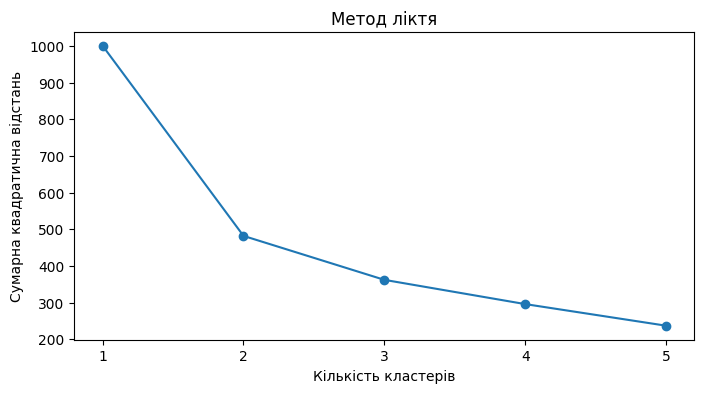

In [36]:
def elbow_method(data, max_k=5):
    distortions = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(8, 4))
    plt.plot(range(1, max_k+1), distortions, marker='o')
    plt.title('Метод ліктя')
    plt.xlabel('Кількість кластерів')
    plt.ylabel('Сумарна квадратична відстань')
    plt.xticks(range(1, max_k+1))
    plt.show()

elbow_method(data_2d)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


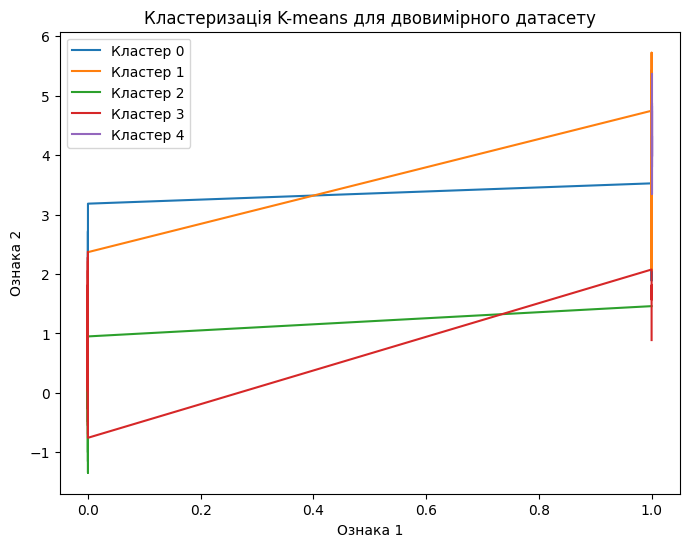

In [37]:
optimal_k = 5
kmeans_2d = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_2d.fit(data_2d)


data_2d['cluster'] = kmeans_2d.labels_

plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    cluster_data = data_2d[data_2d['cluster'] == i]
    plt.plot(cluster_data.iloc[:, 0], cluster_data.iloc[:, 2], label=f'Кластер {i}')
plt.title('Кластеризація K-means для двовимірного датасету')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

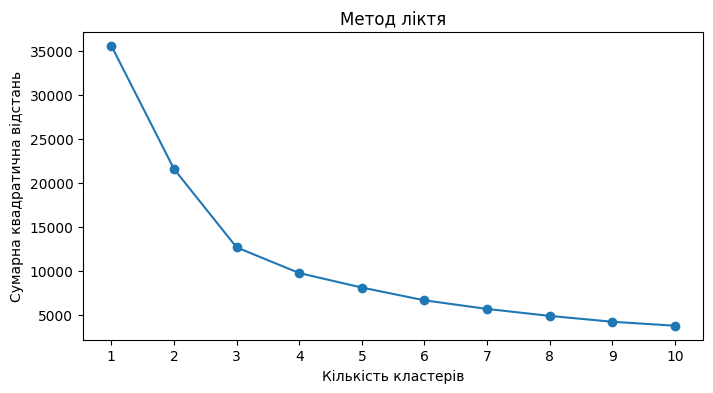

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


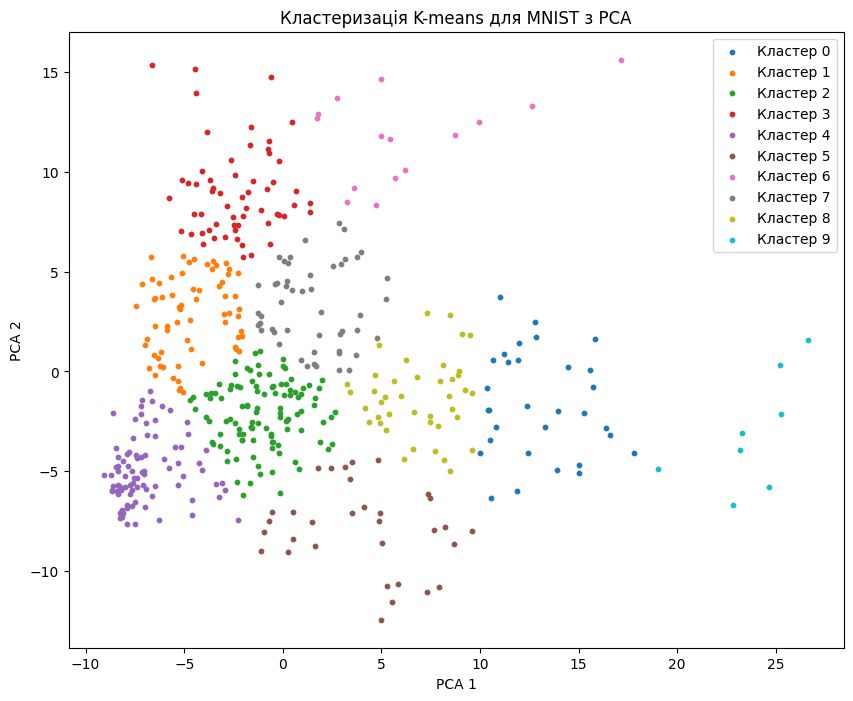

In [23]:
scaler = StandardScaler()
mnist_scaled = scaler.fit_transform(mnist_data)

pca = PCA(n_components=2, random_state=42)
mnist_2d = pca.fit_transform(mnist_scaled)

elbow_method(mnist_2d)

optimal_k_mnist = 10
kmeans_mnist = KMeans(n_clusters=optimal_k_mnist, random_state=42)
kmeans_mnist.fit(mnist_2d)

mnist_data['cluster'] = kmeans_mnist.labels_

plt.figure(figsize=(10, 8))
for i in range(optimal_k_mnist):
    cluster_data = mnist_2d[mnist_data['cluster'] == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Кластер {i}', s=10)
plt.title('Кластеризація K-means для MNIST з PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()
